In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.describe()
#numerical columns only

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.describe(include='all')
#both numerical and statistical columns

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [10]:
#dropping irrelevant features

In [11]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


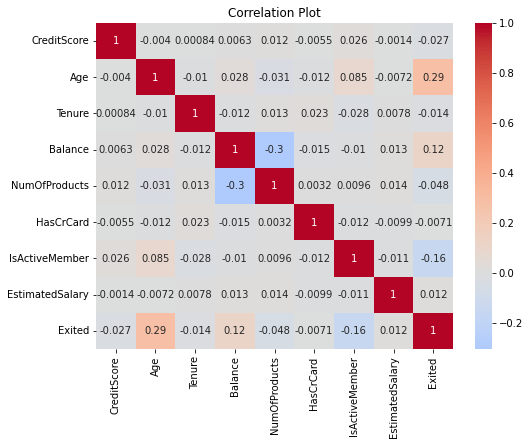

In [14]:
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Plot')
plt.show()

In [14]:
#encoding categorical data

In [15]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
#you cant just assign a number to each country
#the ML model would think there's a relationship
#rather we do
#France - [1,0,0], Spain - [0,1,0], Germany - [0,0,1]

In [17]:
data = pd.get_dummies(data,drop_first=True)
#one hot encoding
#we took the example of Geography column to explain 
#but this code applies it on every categorical column

In [18]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [20]:
# 'Geography_Germany', 'Geography_Spain' are enough to get info about geography, if both are zero, france is obviously 1

In [21]:
#checking if data is balanced

In [22]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [23]:
import seaborn as sns

C:\Users\kosik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

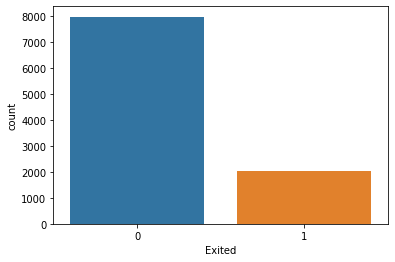

In [24]:
sns.countplot(data['Exited'])

# Handling Imbalanced Data With SMOTE

In [25]:
#oversampling ftw cuz we might lose important data with undersampling

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [28]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [29]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# splitting the dataset 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc= StandardScaler()

In [34]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train

array([[ 0.20243532, -0.09604534,  0.07112116, ..., -0.57735027,
        -0.46600289,  1.18270662],
       [ 1.09837055,  0.10484411, -1.39740972, ..., -0.57735027,
        -0.46600289,  1.18270662],
       [-0.62794367, -0.39737951,  1.53965204, ..., -0.57735027,
        -0.46600289, -0.84551822],
       ...,
       [ 0.20243532,  0.20528883,  1.17251932, ..., -0.57735027,
        -0.46600289,  1.18270662],
       [-0.27831041,  0.30573356,  1.17251932, ..., -0.57735027,
        -0.46600289, -0.84551822],
       [ 0.5302165 ,  1.00884663, -1.39740972, ...,  1.73205081,
        -0.46600289,  1.18270662]])

# Applying Models

In [36]:
#logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log = LogisticRegression()

In [39]:
log.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred1 = log.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [42]:
def print_metrics(y_true, y_pred, should_print=False):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    if should_print:
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
    else:
        return accuracy, precision, recall, f1 

In [43]:
# passed a parameter should_print = False because later in the future I want the function to only return the metric values 
# so that I can pass them into another function, printing would be unnecessary and look messy

In [44]:
print_metrics(y_test, y_pred1, True)

Accuracy: 0.7878217200251099
Precision: 0.773208722741433
Recall: 0.7990985189954926
F1 Score: 0.785940468651045


In [45]:
#SVC

In [46]:
from sklearn import svm

In [47]:
svm = svm.SVC()

In [48]:
svm.fit(X_train,y_train)

SVC()

In [49]:
y_pred2 = svm.predict(X_test)

In [50]:
print_metrics(y_test, y_pred2, True)

Accuracy: 0.8462021343377275
Precision: 0.8340666247642992
Recall: 0.8544752092723761
F1 Score: 0.844147582697201


In [51]:
#KNeighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier()

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred3 = knn.predict(X_test)

In [56]:
print_metrics(y_test, y_pred3, True)

Accuracy: 0.8210922787193974
Precision: 0.7998779743746187
Recall: 0.8441725692208628
F1 Score: 0.8214285714285715


In [57]:
#Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier()

In [60]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred4 = dt.predict(X_test)

In [62]:
print_metrics(y_test, y_pred4, True)

Accuracy: 0.7969240426867545
Precision: 0.7806691449814126
Recall: 0.8113329040566645
F1 Score: 0.7957057151878749


In [63]:
#random forest classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier()

In [66]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
y_pred5 = rf.predict(X_test)

In [68]:
print_metrics(y_test, y_pred5, True)

Accuracy: 0.8587570621468926
Precision: 0.849714648065948
Recall: 0.8628461043142305
F1 Score: 0.8562300319488818


In [69]:
models = [
    log,
    svm,
    knn,
    dt,
    rf,
]

In [70]:
def metrics_to_dataframe(models, Xtest, y_test):
#     metric_columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    for model in models:
        predicted_labels = model.predict(Xtest)
        accuracy, precision, recall, f1 = print_metrics(y_test, predicted_labels)
        
        df = df.append({
            'Model': model.__class__.__name__,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }, ignore_index=True)
    
    df.set_index('Model', inplace=True)
    
    return df

In [71]:
metrics_to_dataframe(models, X_test, y_test)

C:\Users\kosik\AppData\Local\Temp\ipykernel_9696\3128133928.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\kosik\AppData\Local\Temp\ipykernel_9696\3128133928.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\kosik\AppData\Local\Temp\ipykernel_9696\3128133928.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\kosik\AppData\Local\Temp\ipykernel_9696\3128133928.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\kosik\AppData\Local\Temp\ipykernel_9696\3128133928.py:9: FutureWarning: The frame.append method is deprecated and will 

,Accuracy,Precision,Recall,F1 Score
Model,,,,
LogisticRegression,0.787822,0.773209,0.799099,0.785940
SVC,0.846202,0.834067,0.854475,0.844148
KNeighborsClassifier,0.821092,0.799878,0.844173,0.821429
DecisionTreeClassifier,0.796924,0.780669,0.811333,0.795706
RandomForestClassifier,0.858757,0.849715,0.862846,0.856230


In [72]:
result_df = metrics_to_dataframe(models, X_test, y_test)

C:\Users\kosik\AppData\Local\Temp\ipykernel_9696\3128133928.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\kosik\AppData\Local\Temp\ipykernel_9696\3128133928.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\kosik\AppData\Local\Temp\ipykernel_9696\3128133928.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\kosik\AppData\Local\Temp\ipykernel_9696\3128133928.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\kosik\AppData\Local\Temp\ipykernel_9696\3128133928.py:9: FutureWarning: The frame.append method is deprecated and will 

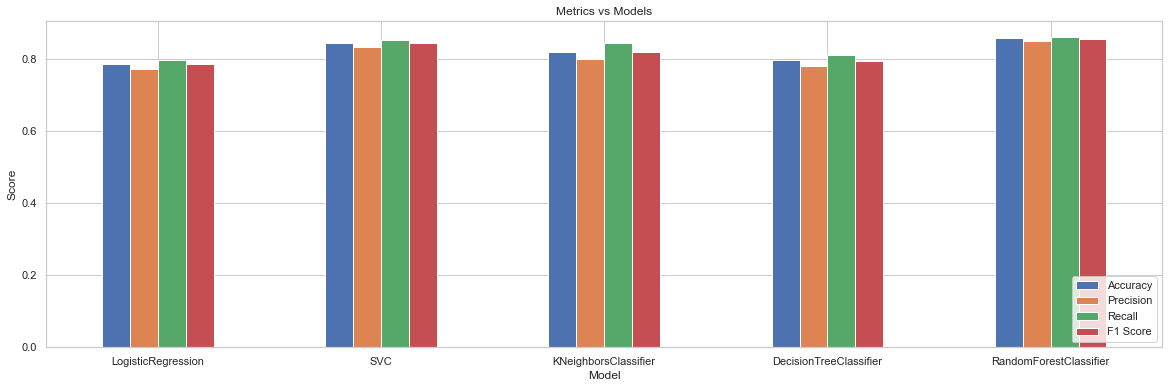

In [73]:
sns.set(style="whitegrid")
result_df.plot(kind='bar', rot=0, figsize=(20,6)) #bard helped here in changing the fig size
plt.title('Metrics vs Models')
plt.ylabel('Score')
plt.legend(loc='lower right') #bard again
plt.show()

In [74]:
#from the numbers in the prev df and the graph above, Random Forest Classifier is the clear winner

# Saving the model

In [75]:
#we've splitted the data set to evaluate its peformance
#But we gotta train it over the entire data set for future purposes

In [76]:
X_res=sc.fit_transform(X_res)

In [77]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [78]:
import joblib

In [79]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [80]:
model = joblib.load('churn_predict_model')

In [81]:
# model.predict(df) to perform predictions 

In [82]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)